In [1]:
import pandas as pd
import random
import os
import numpy as np
from tqdm import tqdm_notebook
from collections import Counter

from gensim.models import Word2Vec
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams.update({'font.size': 15})

In [2]:
path = 'CleanedDL2020.csv'
df = pd.read_csv(path)
df.columns
df.head()

,Tags,Score
0,python<machine-learning<deep-learning<pytorch,0
1,python<tensorflow<deep-learning<version,0
2,python<machine-learning<deep-learning<pytorch,0
3,java<deep-learning<resources<deeplearning4j,1
4,python<tensorflow<deep-learning<neural-network...,4


In [3]:
tags = list(df['Tags'].unique())
all_tags = []
for tag in tqdm_notebook(tags):
    all_tags += tag.split('<')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26836\352278747.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tag in tqdm_notebook(tags):


  0%|          | 0/5392 [00:00<?, ?it/s]

In [4]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

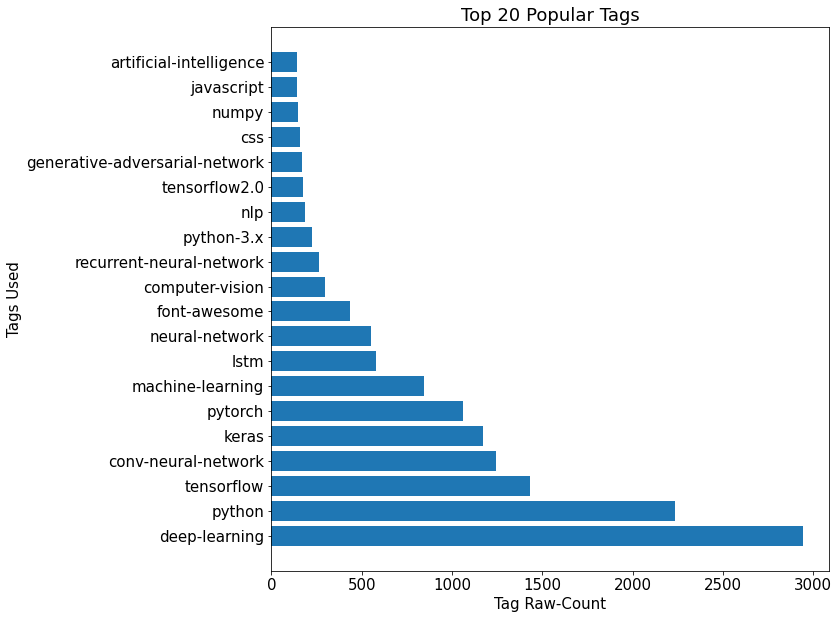

In [5]:
plt.barh(list(tags['tag'])[:20], list(tags['count'])[:20])
plt.ylabel('Tags Used')
plt.xlabel('Tag Raw-Count')
plt.title('Top 20 Popular Tags')
plt.show()

In [6]:
dl = ['conv-neural-network', 'lstm', 'recurrent-neural-network', 'generative-adversarial-network', 'mlp', 'self-organizing-maps', 'som', 'rbm']
x = []
y = []
for tag in dl:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])

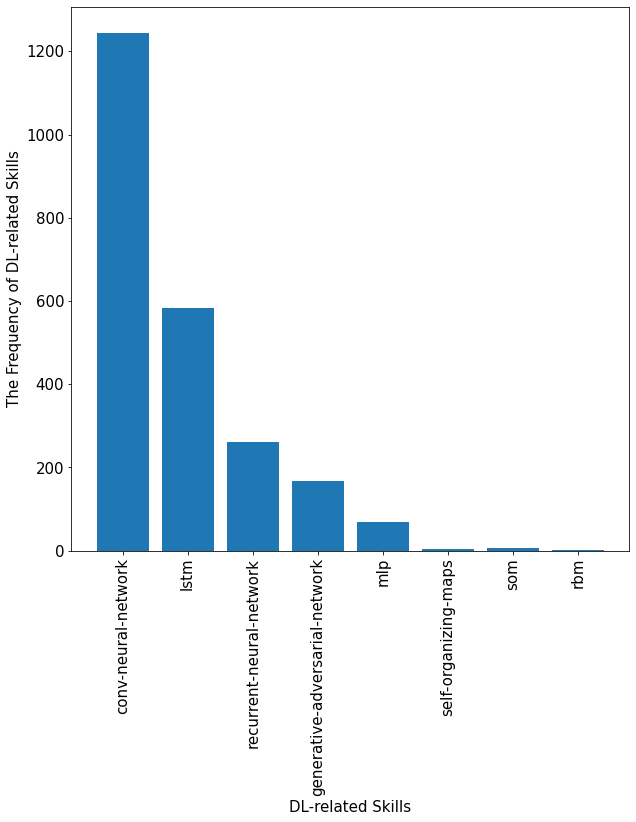

In [7]:
plt.xticks(rotation='vertical')
plt.bar(x, y)
plt.ylabel('The Frequency of DL-related Skills')
plt.xlabel('DL-related Skills')
#plt.show()
plt.savefig("dl.pdf", bbox_inches='tight')